<a href="https://colab.research.google.com/github/alwaysalearner1234/Statistics/blob/main/Normal_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Normal Distribution and Z Score: Math and statistics for data science**



In [1]:
import pandas as pd
import seaborn as sn

We are going to use heights dataset from kaggle.com. Dataset has heights and weights both but I have removed weights to make it simple

https://www.kaggle.com/mustafaali96/weight-height

In [5]:
df = pd.read_csv("weight-height.csv")
display(df.head())

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


**(1) Outlier detection and removal using Standard Deviation**

In [7]:
df.Height.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<Axes: xlabel='Height', ylabel='Count'>

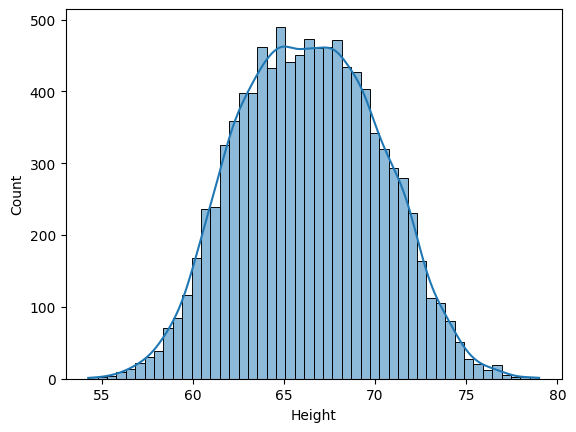

In [9]:
sn.histplot(df.Height, kde=True)

In [13]:
mean = df.Height.mean()
mean


np.float64(66.36755975482124)

In [12]:
std_deviation = df.Height.std()
std_deviation

3.8475281207732324

In [14]:
mean-3*std_deviation


np.float64(54.82497539250154)

In [15]:
mean+3*std_deviation


np.float64(77.91014411714094)

In [17]:
df[(df.Height < 54.82) | (df.Height > 77.91)]


,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [19]:
df_no_outlier = df[(df.Height<77.91) & (df.Height>54.82)]
df_no_outlier.shape

(9993, 3)

**(2) Outlier detection and removal using Z Score**


Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score

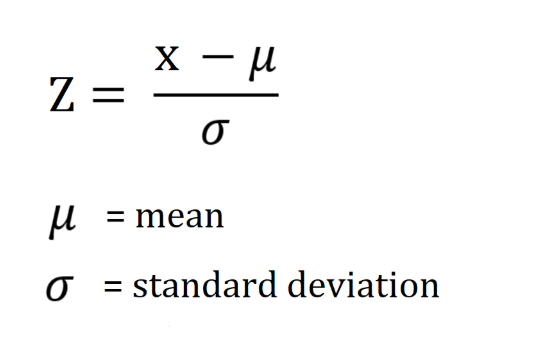





Let's add a new column in our dataframe for this Z score




In [21]:
df['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df.head(5)

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [23]:
df.Height.mean()

np.float64(66.36755975482124)

In [25]:
df.Height.std()


3.8475281207732324

In [26]:
(73.84-66.37)/3.84


1.9453124999999998

In [27]:
df[df['zscore']>3]


,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [28]:
df[df['zscore']<-3]


,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


**Exercise**

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [30]:
import pandas as pd

# Load the CSV
df = pd.read_csv("bhp.csv")

# Inspect the first few rows
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [36]:
# Define lower and upper percentile
lower_bound = df['price_per_sqft'].quantile(0.001)
upper_bound = df['price_per_sqft'].quantile(0.999)

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)


Lower bound: 1250.0
Upper bound: 51056.28593628723


In [37]:
# Keep only rows within the percentile bounds
df_no_outlier = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

# Check shape before and after
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_no_outlier.shape)


Original shape: (13320, 10)
Shape after removing outliers: (13046, 10)


In [38]:
df_no_outlier['price_per_sqft'].describe()


,price_per_sqft
count,13046.000000
mean,6680.405623
std,4157.876143
min,1250.000000
25%,4267.909991
50%,5454.545455
75%,7334.038552
max,50349.650350


In [34]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
display(df.head())

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,4250.000000


In [35]:
# Calculate price per square foot
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
display(df.head())

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,4250.000000


In [39]:
# Calculate price per square foot
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
display(df.head())

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,4250.000000


In [41]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv("bhp.csv")

# Step 2: Inspect the dataset
print("Original dataset shape:", df.shape)
print(df.head())

# Convert 'total_sqft' to numeric, coercing errors
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

# Calculate price per square foot
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

# Drop rows where price_per_sqft is NaN after calculation
df.dropna(subset=['price_per_sqft'], inplace=True)

# Step 3: Calculate lower and upper percentile bounds
lower_bound = df['price_per_sqft'].quantile(0.001)
upper_bound = df['price_per_sqft'].quantile(0.999)

print("Lower bound (0.1th percentile):", lower_bound)
print("Upper bound (99.9th percentile):", upper_bound)

# Step 4: Filter the dataset to remove outliers
df_no_outlier = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

# Step 5: Check the cleaned dataset
print("Dataset shape after removing outliers:", df_no_outlier.shape)
print(df_no_outlier['price_per_sqft'].describe())

# Step 6: (Optional) Save the cleaned dataset
# df_no_outlier.to_csv("bhp_no_outlier.csv", index=False)

Original dataset shape: (13320, 9)
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
Lower bound (0.1th percentile): 1250.0
Upper bound (99.9th percentile): 51056.28593628723
Dataset shape after removing outliers: (13046, 10)
count    13046.000000
mean      6680.405623
std       4157.876143
m

Step 1: Removed outliers using percentiles. New shape: (13046, 10)
Step 3: Removed outliers using 4 std deviations. New shape: (12921, 10)


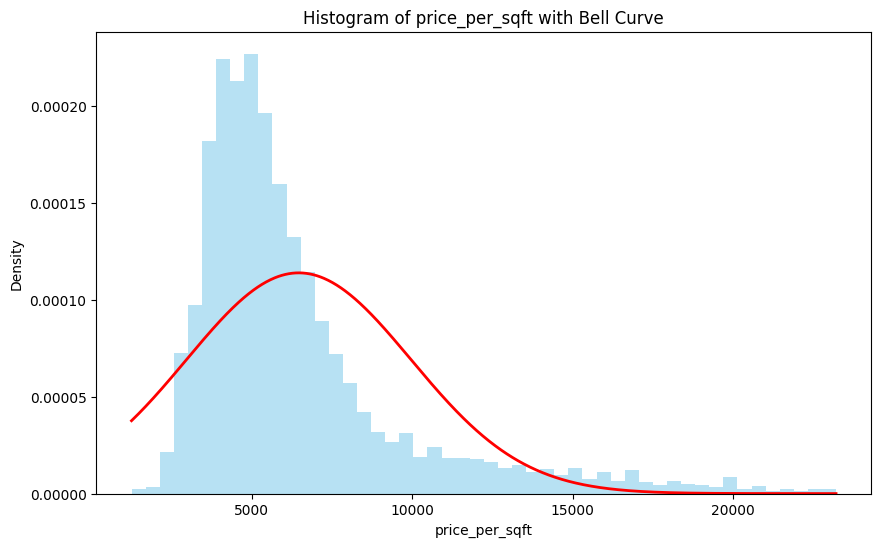

Step 5: Removed outliers using z-score. New shape: (12921, 10)


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, zscore

# Step 0: Load the CSV
df = pd.read_csv('bhp.csv')

# Convert 'total_sqft' to numeric, coercing errors
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

# Calculate price per square foot
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

# Drop rows where price_per_sqft is NaN after calculation
df.dropna(subset=['price_per_sqft'], inplace=True)

# Step 1: Remove outliers using percentiles [0.001, 0.999]
lower_bound = df['price_per_sqft'].quantile(0.001)
upper_bound = df['price_per_sqft'].quantile(0.999)

df_step1 = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]
print(f"Step 1: Removed outliers using percentiles. New shape: {df_step1.shape}")

# Step 2: df_step1 is the new dataframe
df_step2 = df_step1.copy()

# Step 3: Remove outliers using 4 standard deviations
mean_price = df_step2['price_per_sqft'].mean()
std_price = df_step2['price_per_sqft'].std()

df_step3 = df_step2[(df_step2['price_per_sqft'] >= mean_price - 4*std_price) &
                    (df_step2['price_per_sqft'] <= mean_price + 4*std_price)]
print(f"Step 3: Removed outliers using 4 std deviations. New shape: {df_step3.shape}")

# Step 4: Plot histogram + bell curve
plt.figure(figsize=(10,6))

# Histogram
count, bins, ignored = plt.hist(df_step3['price_per_sqft'], bins=50, density=True, alpha=0.6, color='skyblue')

# Bell curve
mu = df_step3['price_per_sqft'].mean()
sigma = df_step3['price_per_sqft'].std()
x = np.linspace(min(bins), max(bins), 1000)
plt.plot(x, norm.pdf(x, mu, sigma), color='red', linewidth=2)

plt.title('Histogram of price_per_sqft with Bell Curve')
plt.xlabel('price_per_sqft')
plt.ylabel('Density')
plt.show()

# Step 5: Remove outliers using z-score of 4 (same as 4 std deviations)
df_step5 = df_step2[(np.abs(zscore(df_step2['price_per_sqft'])) < 4)]
print(f"Step 5: Removed outliers using z-score. New shape: {df_step5.shape}")

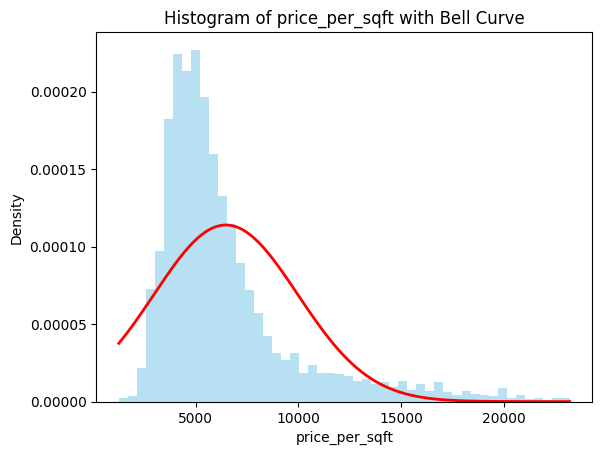

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, zscore

def plot_histogram_with_bellcurve(df, column, bins=50, color='skyblue'):
    """
    Plots histogram and bell curve for a numeric column in a dataframe.

    Parameters:
        df (pd.DataFrame): Dataframe containing the column
        column (str): Column name to plot
        bins (int): Number of bins for histogram
        color (str): Histogram color
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame")

    data = df[column].dropna()

    # Histogram
    count, bins, ignored = plt.hist(data, bins=bins, density=True, alpha=0.6, color=color)

    # Bell curve
    mu = data.mean()
    sigma = data.std()
    x = np.linspace(min(bins), max(bins), 1000)
    plt.plot(x, norm.pdf(x, mu, sigma), color='red', linewidth=2)

    plt.title(f'Histogram of {column} with Bell Curve')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


# Example usage after removing outliers
df = pd.read_csv('bhp.csv')

# Convert 'total_sqft' to numeric, coercing errors
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

# Calculate price per square foot
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

# Drop rows where price_per_sqft is NaN after calculation
df.dropna(subset=['price_per_sqft'], inplace=True)


# Step 1: Percentile filtering
lower = df['price_per_sqft'].quantile(0.001)
upper = df['price_per_sqft'].quantile(0.999)
df_filtered = df[(df['price_per_sqft'] >= lower) & (df['price_per_sqft'] <= upper)]

# Step 3: 4 std deviation filtering
mean_val = df_filtered['price_per_sqft'].mean()
std_val = df_filtered['price_per_sqft'].std()
df_clean = df_filtered[(df_filtered['price_per_sqft'] >= mean_val - 4*std_val) &
                       (df_filtered['price_per_sqft'] <= mean_val + 4*std_val)]

# Plot
plot_histogram_with_bellcurve(df_clean, 'price_per_sqft')

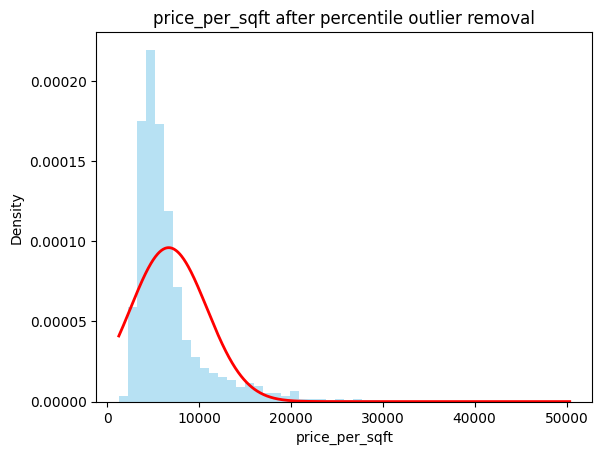

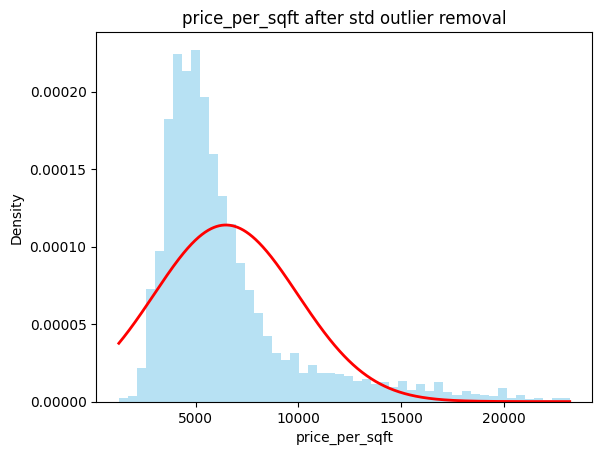

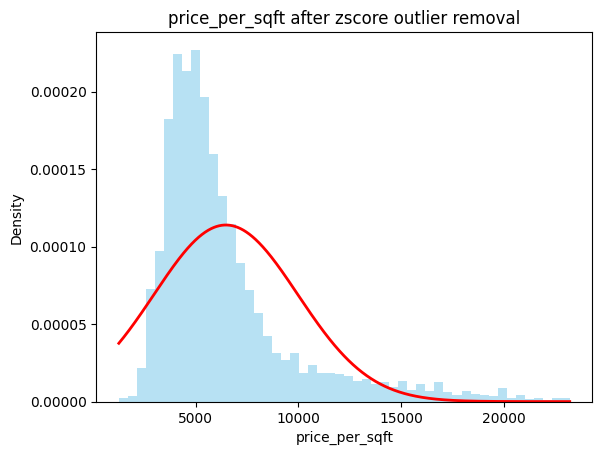

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, zscore

def clean_and_plot(df, column, method='percentile', param=None, bins=50, color='skyblue'):
    """
    Removes outliers and plots histogram with bell curve.

    Parameters:
        df (pd.DataFrame): Input DataFrame
        column (str): Column to analyze
        method (str): 'percentile', 'std', or 'zscore'
        param: Parameter for outlier removal
            - percentile: tuple (lower_quantile, upper_quantile)
            - std: number of standard deviations
            - zscore: z-score threshold
        bins (int): Number of bins for histogram
        color (str): Histogram color
    Returns:
        pd.DataFrame: Cleaned DataFrame
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame")

    df_clean = df.copy() # Start with a copy of the input df

    # Outlier removal
    if method == 'percentile':
        lower_q, upper_q = param if param else (0.001, 0.999)
        lower = df_clean[column].quantile(lower_q)
        upper = df_clean[column].quantile(upper_q)
        df_clean = df_clean[(df_clean[column] >= lower) & (df_clean[column] <= upper)]

    elif method == 'std':
        n_std = param if param else 4
        mean_val = df_clean[column].mean()
        std_val = df_clean[column].std()
        df_clean = df_clean[(df_clean[column] >= mean_val - n_std*std_val) &
                            (df_clean[column] <= mean_val + n_std*std_val)]

    elif method == 'zscore':
        threshold = param if param else 4
        # Calculate z-scores on the column in the current df_clean
        z_scores = np.abs(zscore(df_clean[column].dropna()))
        # Create a boolean mask based on z-scores
        # Need to align the mask with the dataframe index after dropna
        mask_index = df_clean[column].dropna().index
        mask = z_scores < threshold
        # Filter df_clean using the boolean mask aligned by index
        df_clean = df_clean.loc[mask_index[mask]]

    else:
        raise ValueError("method must be 'percentile', 'std', or 'zscore'")

    # Plot histogram + bell curve
    data_clean = df_clean[column].dropna() # Use cleaned data for plotting
    count, bins_vals, ignored = plt.hist(data_clean, bins=bins, density=True, alpha=0.6, color=color)

    mu = data_clean.mean()
    sigma = data_clean.std()
    x = np.linspace(min(bins_vals), max(bins_vals), 1000)
    plt.plot(x, norm.pdf(x, mu, sigma), color='red', linewidth=2)

    plt.title(f'{column} after {method} outlier removal')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

    return df_clean


# -------------------------
# Example usage
df = pd.read_csv('bhp.csv')

# Convert 'total_sqft' to numeric, coercing errors
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

# Calculate price per square foot
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

# Drop rows where price_per_sqft is NaN after calculation
df.dropna(subset=['price_per_sqft'], inplace=True)

# Step 1: Percentile outlier removal
df_step1 = clean_and_plot(df, 'price_per_sqft', method='percentile', param=(0.001, 0.999))

# Step 3: 4 std deviation outlier removal on step1
df_step3 = clean_and_plot(df_step1, 'price_per_sqft', method='std', param=4)

# Step 5: Z-score method (will give same result as step3)
df_step5 = clean_and_plot(df_step1, 'price_per_sqft', method='zscore', param=4)